# Recipe 

<a id="key"></a>
# Table of content 
1) [Business Objective](#1)
   - [Business background](#1.1)
2) [Gathering Data](#2) 
   - [DATA VALIDATION](#2.2)
3) [Data preperation](#3)
   - [Missing data](#3.1)
   - [Encoding data](#3.2)
     - [Feature Extraction](#321)
   - [Scalling data](#3.3)
4) [EDA](#4)
5) [Models Building](#5)
   - [Spliting the data](#5.1)
   - [Decision Tree](#5.2)
   - [Logistic Regression](#5.3)
   - [Random Forest](#5.4)
   - [EXta Randomized Trees](#5.5)
   - [Ada Boost](#5.6)
   - [Ensemble Learner](#565)
   - [GradientBoosting](#5.7)
6) [Model Evaluation](#6)
7) [Deployment in business](#7)
8) [Recommendation for the future](#8)


![ML cycle](image.png)


<h1 id='1' style='color:skyblue'>Business Objective</h1>

<br>
<div style="border-radius:10px;border:skyblue solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
 predict which recipes will be <strong><mark style="background-color:skyblue;color:white;border-radius:4px;opacity:1.0;"> popular 80% of the time </mark></strong> and minimize the chance of showing unpopular recipes. 
</div>
</br>
<br>
<div style="border-radius:10px;border:skyblue solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
 Traffic is so important <strong><mark style="background-color:skyblue;color:white;border-radius:4px;opacity:1.0;"> More traffic
means more subscriptions so this is really important to the company </mark></strong>
</div>
</br>
<br>
<strong><mark style="background-color:red;color:white;border-radius:4px;opacity:1.0;">Old Way !</mark></strong>
<div style="border-radius:10px;border:red solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left"> 
 <strong><mark style="background-color:red;color:white;border-radius:4px;opacity:1.0;">
    The traffic to the rest of the website goes up by as much as 40% if I pick a popular recipe
</mark></strong> 
   ; Picking based on the Admin opinion 
</div>
</br>

<h2 id='11'>Business background</h2>

<br>
<div style="border-radius:10px;border:lightgreen solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
Tasty Bytes was founded in 2020 in the midst of the Covid Pandemic. The world wanted inspiration so we decided to provide it. We started life as a <strong><mark style="background-color:lightgreen;color:white;border-radius:4px;opacity:1.0;"> search engine for recipes</mark></strong>, helping people to find ways to use up the limited supplies they had at home
</div>
</br>

<br>
<div style="border-radius:10px;border:lightgreen solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
For a  <strong><mark style="background-color:lightgreen;color:white;border-radius:4px;opacity:1.0;">  monthly subscription</mark></strong> we will put together a full meal plan to ensure you and your family are getting a healthy, balanced diet
whatever your budget. Subscribe to our premium plan and we will also <strong><mark style="background-color:lightgreen;color:white;border-radius:4px;opacity:1.0;">  deliver the ingredients to your door.</mark></strong>
</div>
</br>

<h1 id='2' style='color:skyblue'>Gathering Data</h1>

<br>
<div style="border-radius:10px;border:skyblue solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
 The product manager has tried to make this easier for us and provided data for each recipe, as well as whether there was high traffic when the recipe was featured on the home page
</div>
</br>

<h2 id='22' style='color:salmon'>DATA VALIDATION</h2>

- Dataset has 947 rows, 8 columns 
- Recipe ✅ Numerical id
- Calories ❌ Numerical has missing data
- Carbohydrates ❌ Numerical has missing data
- Sugar ❌ Numerical has missing data
- Protein ❌ Numerical has missing data
- Category ❌ String type but it 11 categories not 10 has no missing data
- Servings ❌ Not Numerical as some values has a text like ‘4 as snack’ no missing data
- High-traffic ✅ the missing data represent the recipes with low traffic

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")

displaying our dataset

In [3]:
recipe = pd.read_csv('recipe_site_traffic_2212.csv')
recipe

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


some info about the columns we have and the data types of each column

In [4]:
recipe.info()
# only three columns that have no messing values 
# recipe
# category 
# servings 

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 947 entries, 0 to 946

Data columns (total 8 columns):

 #   Column        Non-Null Count  Dtype  

---  ------        --------------  -----  

 0   recipe        947 non-null    int64  

 1   calories      895 non-null    float64

 2   carbohydrate  895 non-null    float64

 3   sugar         895 non-null    float64

 4   protein       895 non-null    float64

 5   category      947 non-null    object 

 6   servings      947 non-null    object 

 7   high_traffic  574 non-null    object 

dtypes: float64(4), int64(1), object(3)

memory usage: 59.3+ KB


statistical information about the columns in our dataset

In [5]:
recipe.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


describtion of the strings columns we have 

In [6]:
recipe.describe(include='O')

,category,servings,high_traffic
count,947,947,574
unique,11,6,1
top,Breakfast,4,High
freq,106,389,574


The categories we have for recipes

In [7]:
recipe['category'].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

❌ represent this column not as described in the data describtion file ❌

category column here has 11 category not 10 

In [8]:
# category ❌ 
'''
Claim 
Character, type of recipe.  
Recipes are listed in one of ten (11✅⚠️)
possible groupings (Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal'). 
'''

"\nClaim \nCharacter, type of recipe.  \nRecipes are listed in one of ten (11✅⚠️)\npossible groupings (Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal'). \n"

In [9]:
recipe['servings'].value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

servings should be numerical but due to the "2 as a snack" or "6 as a snack" it failed to match the describtion we will fix this in the common steps

In [10]:
# Serving ❌ 
'''
Claim 
Numeric, (object ✅⚠️)
number of servings for the recipe
 
'''
''' 
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
'''

' \n4               389\n6               197\n2               183\n1               175\n4 as a snack      2\n6 as a snack      1\n'

alot of missing data which is low traffic recipes or more accurate the recipes that is not a high traffic one

In [11]:
recipe['high_traffic'].value_counts()
# messing values when the traffic was low 

High    574
Name: high_traffic, dtype: int64

<h1 id='3' style='color:skyblue'>Data preperation</h1>

- Filling the missing data with the suitable method.
- Feature extraction to make categories out of the numerical features (continuous -> discrete).
- Encoding the data from strings to be numbers so that the model can deal with it

<h2 id='31' style='color:salmon'>Missing data</h2>

columns that have missing data
- High_traffic
- calories
- protein
- sugar

In [12]:
recipe.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

replacing the null values in the target feature to "low"

In [13]:
# filling high_traffic 
recipe['high_traffic'].fillna('low', inplace=True)

In [14]:
recipe.head(3)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,low


In [15]:
recipe.columns


Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category',
       'servings', 'high_traffic'],
      dtype='object')

to better understand the columns we have as a variables or feature we need to categorize them that will help us in the preprocessing and the encoding or scalling based on the type 

![image-1](image-1.png)


> list the features we have 
- <span style="color:skyblue">Categorical features</span> 
  - high_traffic
  - servings
  - category
- <span style="color:skyblue">Numerical features</span> 
  - <span style="color:salmon">Discrete</span> 
    - recipe
  - <span style="color:salmon">Continous</span> 
    - carbohydrate
    - protein
    - sugar
    - calories

In [16]:
recipe.isnull().sum()
# we have three left to deal with

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

The pair plot provides valuable insights into the distribution of data and enhances the visualization by incorporating color to represent the distribution of the classes we are trying to predict across each feature. By incorporating color, we can effectively convey additional dimensions and patterns within the graph.

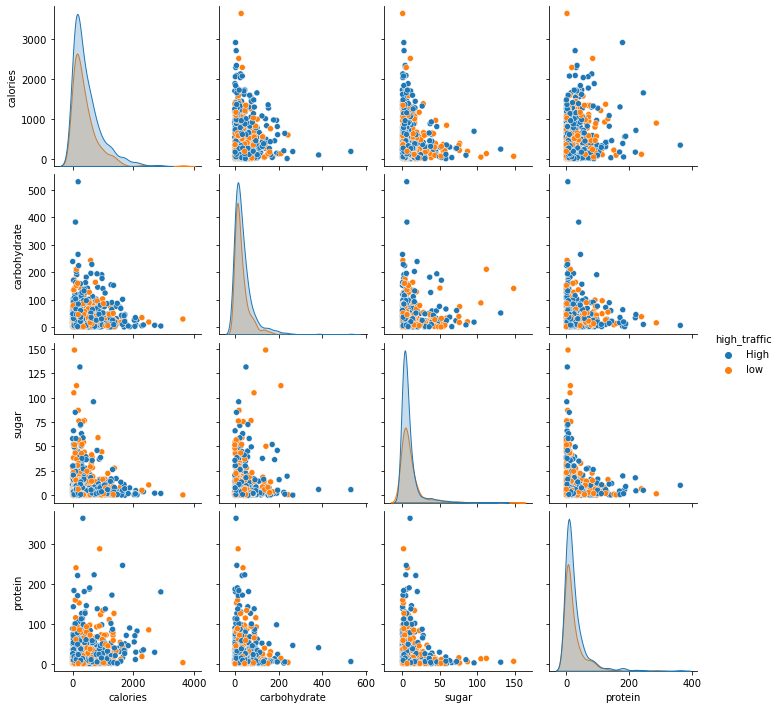

In [17]:
sns.pairplot(recipe.loc[:, ['calories', 'carbohydrate', 'sugar', 'protein', 'high_traffic']], hue='high_traffic');

<br>
<strong><mark style="background-color:red;color:white;border-radius:4px;opacity:1.0;">Skewed distribution of most features has missing values !</mark></strong>
<div style="border-radius:10px;border:red solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left"> 
 <strong><mark style="background-color:red;color:white;border-radius:4px;opacity:1.0;">
    Using Median can be more roubust aganist outliers
</mark></strong> 

</div>
</br>

In [18]:
# calories        52
# carbohydrate    52
# sugar           52
# protein         52

> as we can see the median is near to the most of the data and is more robust to the outliers so I prefered to fill the missing data with it 
> we may use other options like the mean or a simple model if we have more data using the correlated features to predict the missing data or using a random sampling follow a similar distribution (exp)

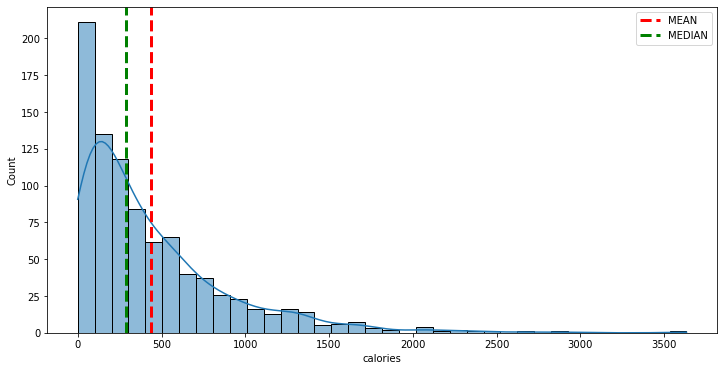

In [19]:
# calories 
plt.figure(figsize=(12, 6))
sns.histplot(recipe['calories'].dropna(), kde=True)

# mean VS median 
cal_mean, cal_median = recipe['calories'].mean(), recipe['calories'].median()

# Vertical lines for mean and median 
plt.axvline(cal_mean, color='red', linestyle='dashed', linewidth=3, label='MEAN')
plt.axvline(cal_median, color='green', linestyle='dashed', linewidth=3, label='MEDIAN')

# Add labels
plt.legend()

In [20]:
# filling calories
recipe.calories.fillna(cal_median, inplace=True)

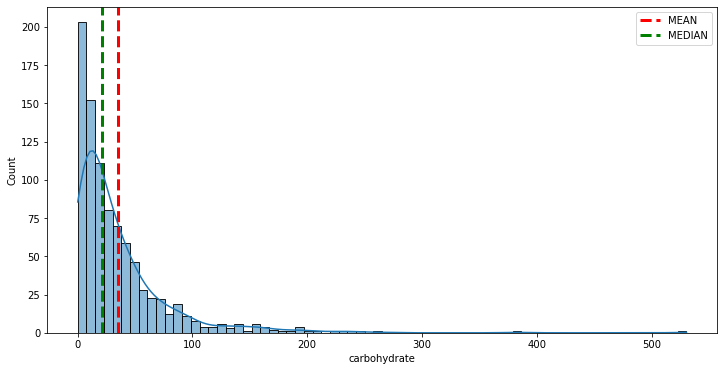

In [21]:
# carbohydrate
plt.figure(figsize=(12, 6))
sns.histplot(recipe['carbohydrate'].dropna(), kde=True)

# mean VS median 
car_mean, car_median = recipe['carbohydrate'].mean(), recipe['carbohydrate'].median()

# Vertical lines for mean and median 
plt.axvline(car_mean, color='red', linestyle='dashed', linewidth=3, label='MEAN')
plt.axvline(car_median, color='green', linestyle='dashed', linewidth=3, label='MEDIAN')

# Add labels
plt.legend()

In [22]:
# filling carbohydrate
recipe.carbohydrate.fillna(car_median, inplace=True)

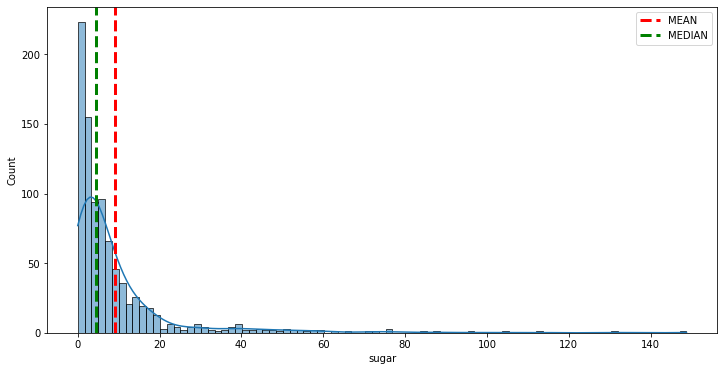

In [23]:
# sugar 
plt.figure(figsize=(12, 6))
sns.histplot(recipe['sugar'].dropna(), kde=True)

# mean VS median 
su_mean, su_median = recipe['sugar'].mean(), recipe['sugar'].median()

# Vertical lines for mean and median 
plt.axvline(su_mean, color='red', linestyle='dashed', linewidth=3, label='MEAN')
plt.axvline(su_median, color='green', linestyle='dashed', linewidth=3, label='MEDIAN')

# Add labels
plt.legend()

In [24]:
# filling sugar
recipe.sugar.fillna(su_mean, inplace=True)

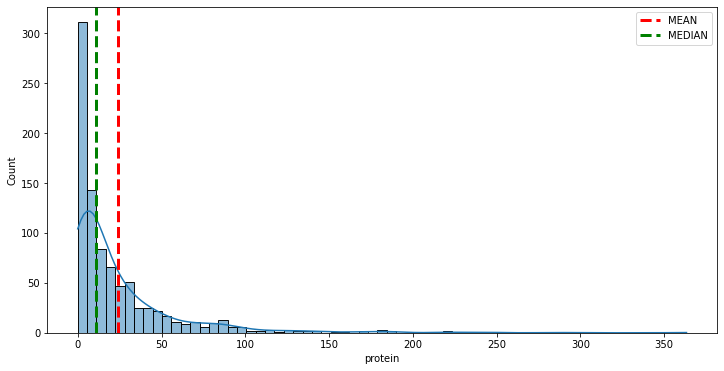

In [25]:
# protein
plt.figure(figsize=(12, 6))
sns.histplot(recipe['protein'].dropna(), kde=True)

# mean VS median 
pro_mean, pro_median = recipe['protein'].mean(), recipe['protein'].median()

# Vertical lines for mean and median 
plt.axvline(pro_mean, color='red', linestyle='dashed', linewidth=3, label='MEAN')
plt.axvline(pro_median, color='green', linestyle='dashed', linewidth=3, label='MEDIAN')

# Add labels
plt.legend()

In [26]:
# protein
recipe.protein.fillna(pro_median, inplace=True)

we now have no missing data 

In [27]:
recipe.isnull().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

<h2 id='32' style='color:salmon'>Encoding data</h2>

> columns that will need to be encoded by nature 

In [28]:
# categorical features
recipe.select_dtypes(include='O').columns

Index(['category', 'servings', 'high_traffic'], dtype='object')

<h3 id='321' style='color:salmon'>Feature Extraction</h3>

we can extract more columns from numerical features to represent categories. For instance, we can define a specific sugar level interval as "high sugar," which may appeal to some people in a recipe while others may not prefer it. This approach allows for a more nuanced representation of the data, capturing both numerical and categorical aspects.

In [29]:
recipe.select_dtypes(include='float').columns

Index(['calories', 'carbohydrate', 'sugar', 'protein'], dtype='object')

<AxesSubplot:xlabel='calories', ylabel='Count'>

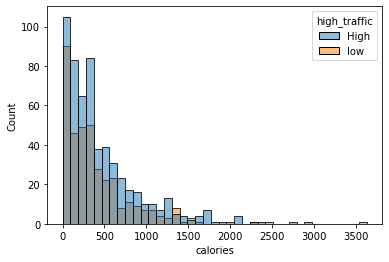

In [30]:
sns.histplot(data=recipe, x=recipe['calories'], hue='high_traffic')

In [31]:
# creating a new features out of the one exist
recipe['calories_cat'] = pd.cut(recipe['calories'], bins=[0, 500, 1000, 1500, 2000], labels=['too low', 'low', 'Meduim', 'high'])

<AxesSubplot:xlabel='carbohydrate', ylabel='Count'>

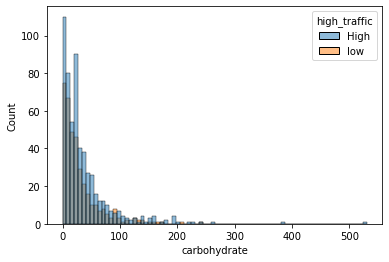

In [32]:
sns.histplot(data=recipe, x=recipe['carbohydrate'], hue='high_traffic')

In [33]:
recipe['carbohydrate_cat'] = pd.cut(recipe['carbohydrate'], bins=[0, 70, 100, 200, 700], labels=['too low', 'low', 'Meduim', 'high'])

<AxesSubplot:xlabel='sugar', ylabel='Count'>

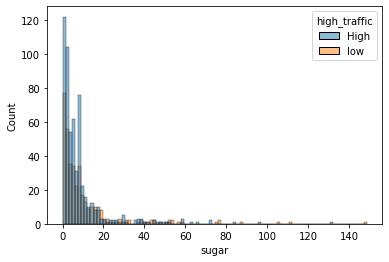

In [34]:
sns.histplot(data=recipe, x=recipe['sugar'], hue='high_traffic')

In [35]:
recipe['sugar_cat'] = pd.cut(recipe['sugar'], bins=[0, 17, 20, 40, 200], labels=['too low', 'low', 'Meduim', 'high'])

<AxesSubplot:xlabel='protein', ylabel='Count'>

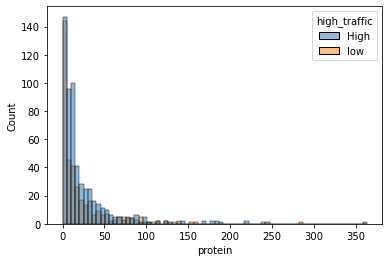

In [36]:
sns.histplot(data=recipe, x=recipe.protein, hue='high_traffic')

In [37]:
recipe['protein_cat'] = pd.cut(recipe['protein'], bins=[0, 30, 50, 100, 500], labels=['too low', 'low', 'Meduim', 'high'])

In [38]:
recipe

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,calories_cat,carbohydrate_cat,sugar_cat,protein_cat
0,1,288.55,21.48,9.046547,10.80,Pork,6,High,too low,too low,too low,too low
1,2,35.48,38.56,0.660000,0.92,Potato,4,High,too low,too low,too low,too low
2,3,914.28,42.68,3.090000,2.88,Breakfast,1,low,low,too low,too low,too low
3,4,97.03,30.56,38.630000,0.02,Beverages,4,High,too low,too low,Meduim,too low
4,5,27.05,1.85,0.800000,0.53,Beverages,4,low,too low,too low,too low,too low
...,...,...,...,...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.390000,44.22,Lunch/Snacks,2,low,Meduim,too low,Meduim,low
943,944,288.55,21.48,9.046547,10.80,Potato,2,High,too low,too low,too low,too low
944,945,951.74,29.42,3.570000,13.87,Pork,2,High,low,too low,too low,too low
945,946,266.61,35.77,0.970000,8.07,Potato,6,High,too low,too low,too low,too low


In [39]:
catcols = recipe.select_dtypes(include=['object', 'category']).columns
catcols

Index(['category', 'servings', 'high_traffic', 'calories_cat',
       'carbohydrate_cat', 'sugar_cat', 'protein_cat'],
      dtype='object')

> This interactive chart can give us a lot of insights about how the sugar categories affect the traffic of the recipes, we can notice that it doesn't have large effect at all 
- Hight (574)
     - "too low" recipes that has high traffic (519) => 90%
     - "Meduim" recipes that has high traffic (25) => 4%
     - "high" recipes that has high traffic (18) => 3%
     - "low" recipes that has high traffic (12) => 2%
- low (373)
     - "too low" recipes that has high traffic (319) => 85%
     - "Meduim" recipes that has high traffic (19) => 5%
     - "high" recipes that has high traffic (20) => 5%
     - "low" recipes that has high traffic (15) => 4%
> <mark>We can see that there is too low sugar level recipes in both classes hight traffic or low traffic and for the other sugar levels we can see it's distributed the same in both classes
</mark>


In [40]:
px.sunburst(recipe, path=['high_traffic', 'sugar_cat'])


>Here we can see the carbohydrate levels (categories) vs the high traffic. In this interactive chart, we can see a **little more diversity** in the distribution of different categories of carbohydrate levels. This infers more distinguishing factors for determining and distinguishing between high traffic and low traffic recipes.

In [41]:
px.sunburst(recipe, path=['high_traffic', 'carbohydrate_cat'])


Here we can observe a **greater diversity** in categories with high and low traffic. For instance, potato, vegetable, and pork are the top three categories with high traffic recipes, while Beverages, Breakfast, and Chicken Breast are the top three categories with low traffic recipes.

In [42]:
px.sunburst(recipe, path=['high_traffic', 'category'])


a meduim diversity in this feature

In [43]:
px.sunburst(recipe, path=['high_traffic', 'servings'])


we can see for each cat-column (feature) in our dataset how the categories is distributed 

In [44]:
# Value Count
for col in catcols:
    print(f"{col}", '+'*30)
    print(recipe[col].value_counts())

category ++++++++++++++++++++++++++++++

Breakfast         106

Chicken Breast     98

Beverages          92

Lunch/Snacks       89

Potato             88

Pork               84

Vegetable          83

Dessert            83

Meat               79

Chicken            74

One Dish Meal      71

Name: category, dtype: int64

servings ++++++++++++++++++++++++++++++

4               389

6               197

2               183

1               175

4 as a snack      2

6 as a snack      1

Name: servings, dtype: int64

high_traffic ++++++++++++++++++++++++++++++

High    574

low     373

Name: high_traffic, dtype: int64

calories_cat ++++++++++++++++++++++++++++++

too low    659

low        193

Meduim      64

high        19

Name: calories_cat, dtype: int64

carbohydrate_cat ++++++++++++++++++++++++++++++

too low    829

low         60

Meduim      49

high         9

Name: carbohydrate_cat, dtype: int64

sugar_cat ++++++++++++++++++++++++++++++

too low    838

Meduim      44

high  

> we notice outliers so we decided to replace them with a more meaningful categories it doesn't matter if you serveings is 4 or 6 as a snack or a main meal too much

In [45]:
# outliers in servings
''' 
4 as a snack      2
6 as a snack      1
'''
# dictionary for replacement
replacement_dict = {'4 as a snack': '4', '6 as a snack': '6'}
recipe.servings.replace(replacement_dict, inplace=True)

# show new value_counts
recipe.servings.value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

Encoding the strings to numbers for each distinct value with a distict number

In [46]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

# initating encoder
encoder = LabelEncoder()

# looping over the columns need to be encoded 
for col in catcols:
    recipe[col] = encoder.fit_transform(recipe[col])

# display results
recipe

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,calories_cat,carbohydrate_cat,sugar_cat,protein_cat
0,1,288.55,21.48,9.046547,10.80,8,3,0,3,3,3,3
1,2,35.48,38.56,0.660000,0.92,9,2,0,3,3,3,3
2,3,914.28,42.68,3.090000,2.88,1,0,1,2,3,3,3
3,4,97.03,30.56,38.630000,0.02,0,2,0,3,3,0,3
4,5,27.05,1.85,0.800000,0.53,0,2,1,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.390000,44.22,5,1,1,0,3,0,2
943,944,288.55,21.48,9.046547,10.80,9,1,0,3,3,3,3
944,945,951.74,29.42,3.570000,13.87,8,1,0,2,3,3,3
945,946,266.61,35.77,0.970000,8.07,9,3,0,3,3,3,3


<h1 id='4' style='color:skyblue'>EDA</h1>

In [47]:
# ['too low', 'low', 'Meduim', 'high']
recipe.carbohydrate_cat.value_counts()

3    829
2     60
0     49
1      9
Name: carbohydrate_cat, dtype: int64

In [48]:
recipe.high_traffic.value_counts()
# 0 574 high

0    574
1    373
Name: high_traffic, dtype: int64

In this grid of graphs, we can visualize how the numerical and categorical features are distributed. We can also see the distribution of each level or category extracted from the categorical columns. Additionally, a pie chart shows the percentage of high traffic and low traffic. The coloring adds another dimension by showing the distribution of each class. Finally, the last graph visualizes the correlation between other features and the target, the larger the absoulte of the number the more it affect the target.

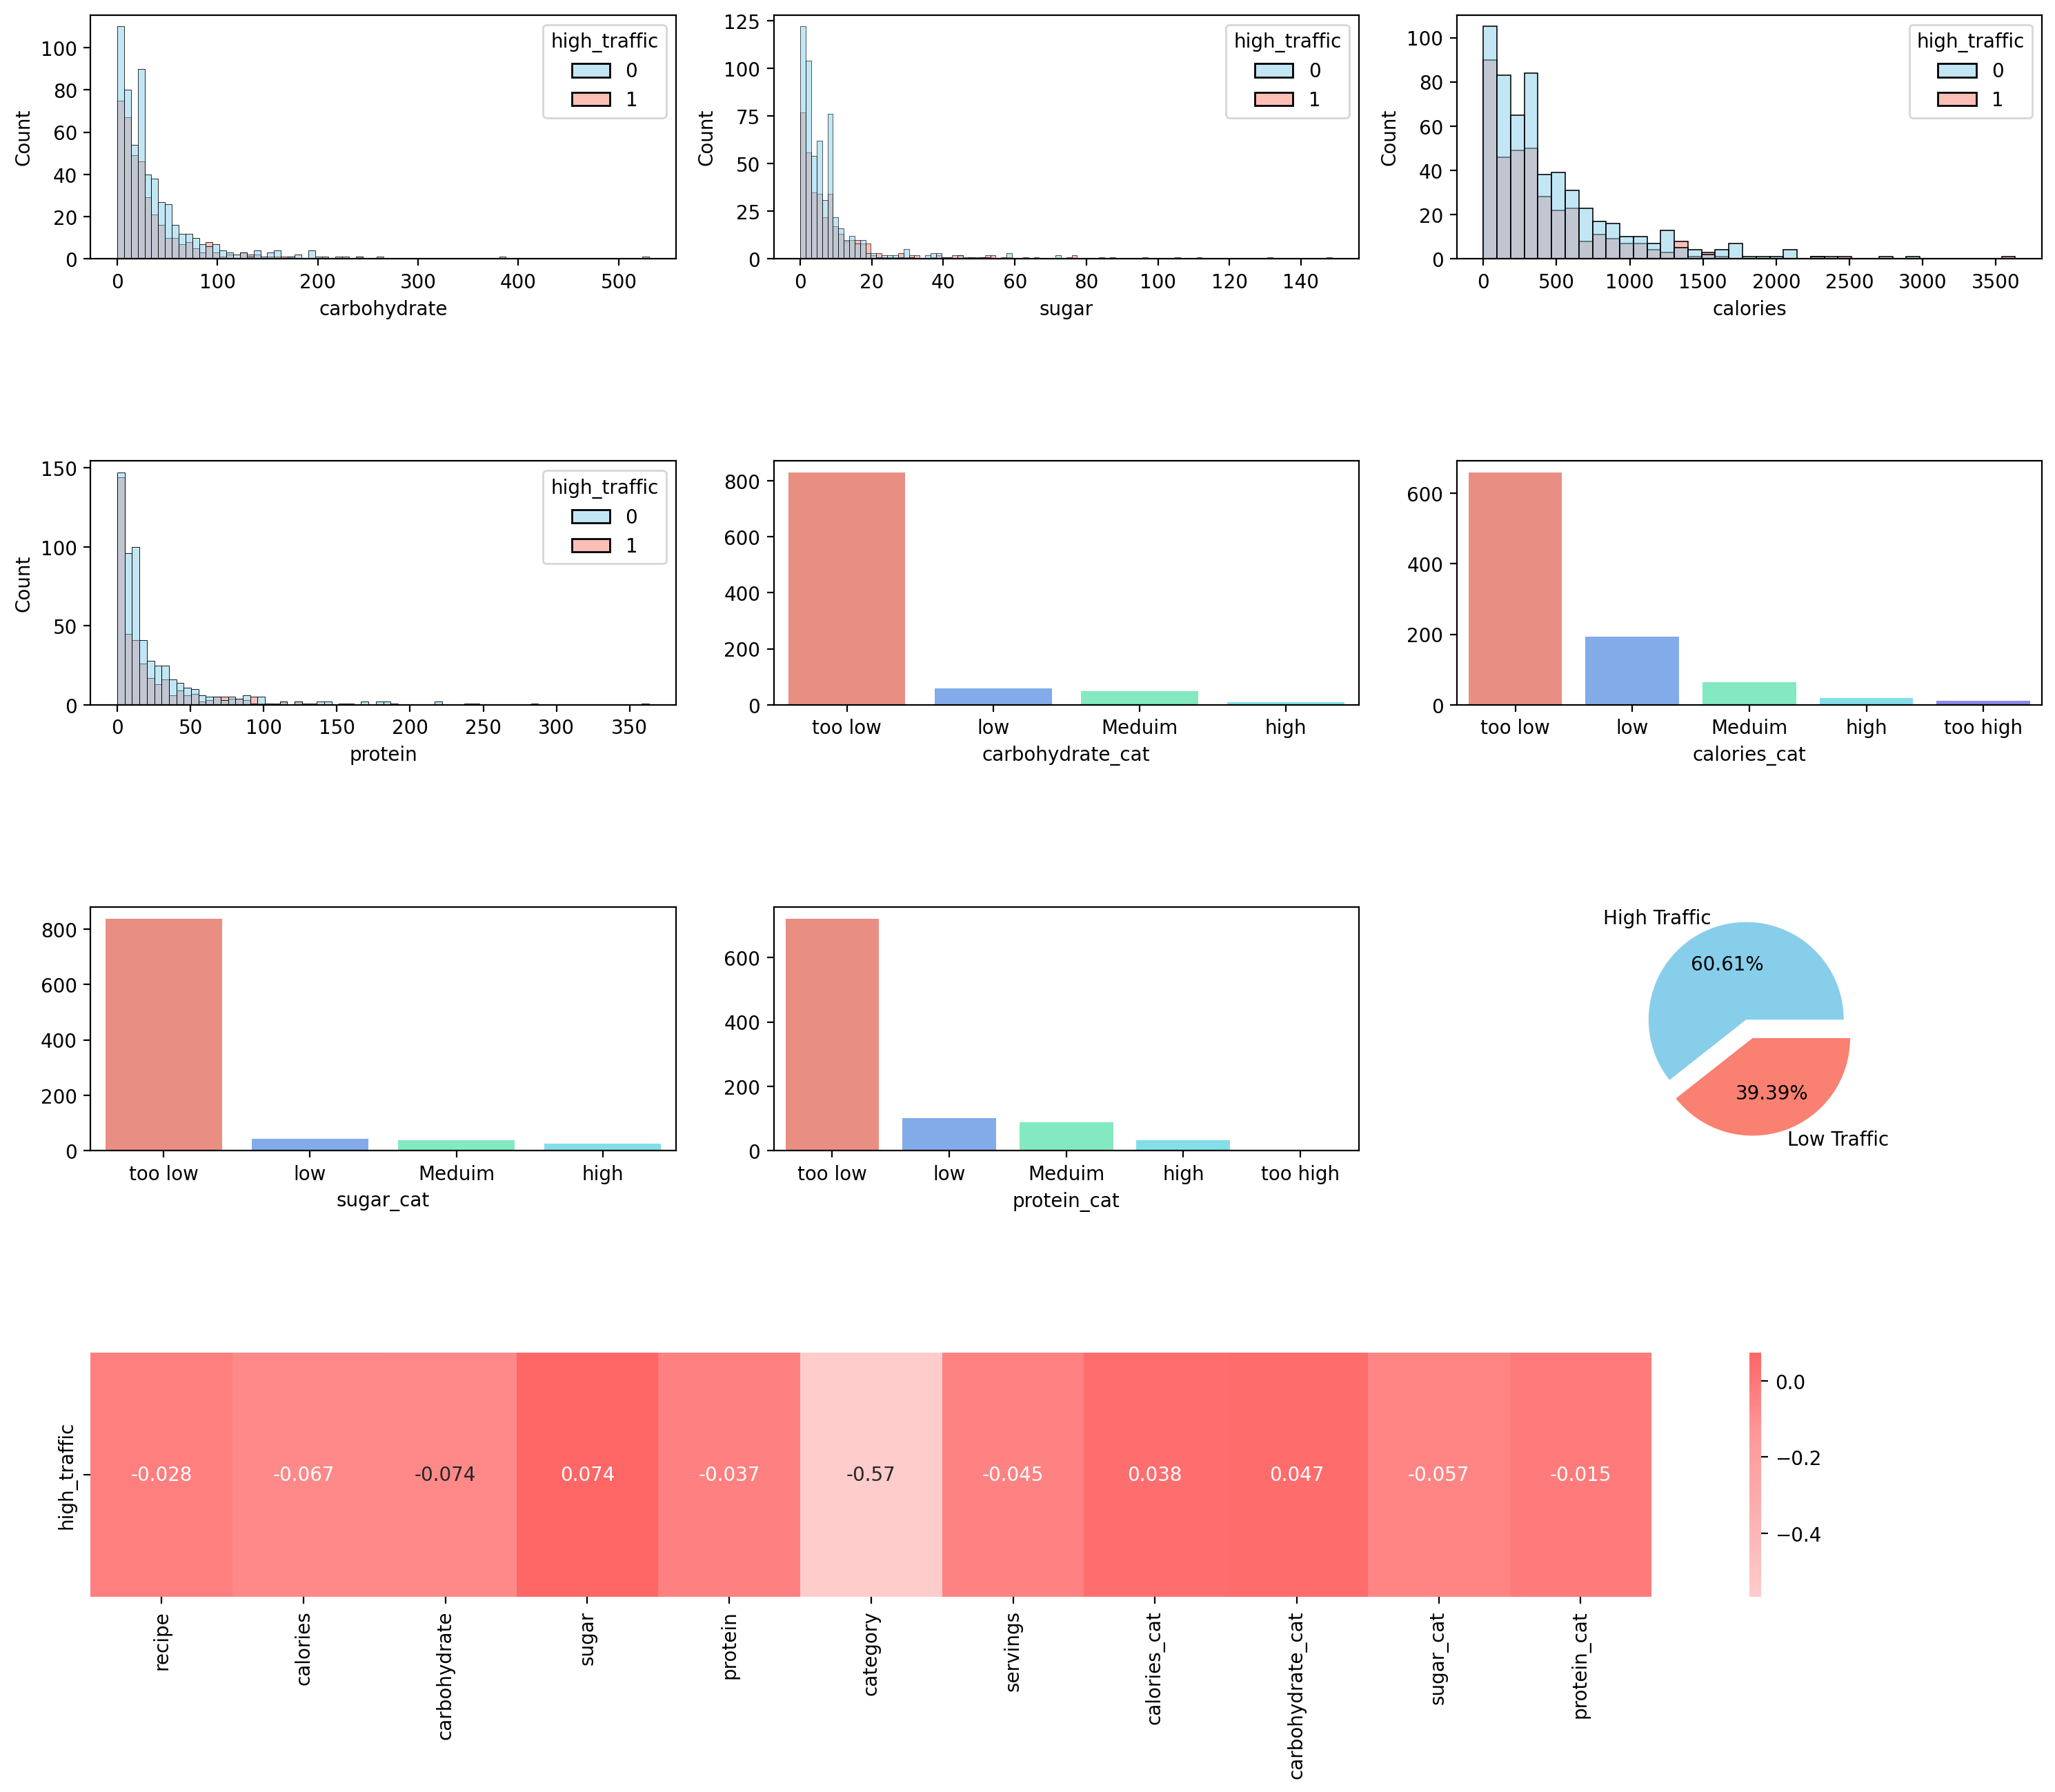

In [49]:
# some EDA before scalling the data
ax = [None for i in range(10)]

# the size and the quality of the graph
fig = plt.figure(figsize=(15,15), dpi=200)

# making the structure 
# Hist plots
ax[0] = plt.subplot2grid((5, 3), (0, 0), colspan=1)
sns.histplot(data=recipe, x='carbohydrate', ax=ax[0], hue='high_traffic', palette=['skyblue', 'salmon'])
# ax[0].hist(data=recipe, x='carbohydrate', color='skyblue')
ax[1] = plt.subplot2grid((5, 3), (0, 1), colspan=1)
sns.histplot(data=recipe, x='sugar', ax=ax[1], hue='high_traffic', palette=['skyblue', 'salmon'])
ax[2] = plt.subplot2grid((5, 3), (0, 2), colspan=1)
sns.histplot(data=recipe, x='calories', ax=ax[2], hue='high_traffic', palette=['skyblue', 'salmon'])
ax[3] = plt.subplot2grid((5, 3), (1, 0), colspan=1)
sns.histplot(data=recipe, x='protein', ax=ax[3], hue='high_traffic', palette=['skyblue', 'salmon'])

# palette
palette = {'too low':'#fa8072', 'low': '#72a8fa', 'Meduim':'#72fac4', 'high':'#72ebfa', 'too high':'#7878ff'}

ax[4] = plt.subplot2grid((5, 3), (1, 1), colspan=1)
# sns.barplot(data=recipe, x=['too low', 'low', 'Meduim', 'high', 'too high'], y=recipe.carbohydrate_cat.value_counts().values)
sns.barplot(data=recipe, x=['too low', 'low', 'Meduim', 'high'], y=recipe.carbohydrate_cat.value_counts().values, ax=ax[4], palette=palette)
ax[4].set_xlabel('carbohydrate_cat')

ax[5] = plt.subplot2grid((5, 3), (1, 2), colspan=1)
sns.barplot(data=recipe, x=['too low', 'low', 'Meduim', 'high', 'too high'], y=recipe.calories_cat.value_counts().values, ax=ax[5], palette=palette)
ax[5].set_xlabel('calories_cat')

ax[6] = plt.subplot2grid((5, 3), (2, 0), colspan=1)
sns.barplot(data=recipe, x=['too low', 'low', 'Meduim', 'high'], y=recipe.sugar_cat.value_counts().values, ax=ax[6], palette=palette)
ax[6].set_xlabel('sugar_cat')

ax[7] = plt.subplot2grid((5, 3), (2, 1), colspan=1)
sns.barplot(data=recipe, x=['too low', 'low', 'Meduim', 'high', 'too high'], y=recipe.protein_cat.value_counts().values, ax=ax[7], palette=palette)
ax[7].set_xlabel('protein_cat')

ax[8] = plt.subplot2grid((5, 3), (2, 2), colspan=1)
ax[8].pie(recipe.high_traffic.value_counts(), labels=['High Traffic', 'Low Traffic'], colors=['skyblue', 'salmon'], explode=(0.1,0.1), autopct='%1.2f%%' )

ax[9] = plt.subplot2grid((5, 3), (3, 0), colspan=3)

corr = recipe.corr()
target_correlation = corr['high_traffic']
target_correlation_df = target_correlation.drop("high_traffic")
target_correlation_matrix = target_correlation_df.values.reshape(1, -1)

# Create a custom colormap that smoothly transitions between the colors
custom_colors = ['#ffcccc','#fcb0b1','#ff9999','#ff6666']
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", custom_colors, N=256)
sns.heatmap(data=target_correlation_matrix, annot=True, cmap=custom_cmap, ax=ax[9], xticklabels=target_correlation_df.index, yticklabels=["high_traffic"])


fig.tight_layout()



> let's foucs on the correlated columns and see how they infere us about the target by sorting them 

sorting by the smallest to the largest 

In [50]:
corr.loc['high_traffic'].sort_values()

category           -0.567337
carbohydrate       -0.073620
calories           -0.066960
sugar_cat          -0.056876
servings           -0.045129
protein            -0.037243
recipe             -0.028159
protein_cat        -0.014814
calories_cat        0.037996
carbohydrate_cat    0.047248
sugar               0.073686
high_traffic        1.000000
Name: high_traffic, dtype: float64

sorting the absolute (Descending) ✨ 

In [51]:
# the things correlate with the hight_traffic
corr.loc['high_traffic'].apply(abs).sort_values(ascending=False)


high_traffic        1.000000
category            0.567337
sugar               0.073686
carbohydrate        0.073620
calories            0.066960
sugar_cat           0.056876
carbohydrate_cat    0.047248
servings            0.045129
calories_cat        0.037996
protein             0.037243
recipe              0.028159
protein_cat         0.014814
Name: high_traffic, dtype: float64

seeing the columns after encoding

In [52]:
# Value Count
for col in catcols:
    print(f"{col}", '+'*30)
    print(recipe[col].value_counts())

category ++++++++++++++++++++++++++++++

1     106

3      98

0      92

5      89

9      88

8      84

10     83

4      83

6      79

2      74

7      71

Name: category, dtype: int64

servings ++++++++++++++++++++++++++++++

2    391

3    198

1    183

0    175

Name: servings, dtype: int64

high_traffic ++++++++++++++++++++++++++++++

0    574

1    373

Name: high_traffic, dtype: int64

calories_cat ++++++++++++++++++++++++++++++

3    659

2    193

0     64

1     19

4     12

Name: calories_cat, dtype: int64

carbohydrate_cat ++++++++++++++++++++++++++++++

3    829

2     60

0     49

1      9

Name: carbohydrate_cat, dtype: int64

sugar_cat ++++++++++++++++++++++++++++++

3    838

0     44

1     38

2     27

Name: sugar_cat, dtype: int64

protein_cat ++++++++++++++++++++++++++++++

3    721

2    102

0     89

1     33

4      2

Name: protein_cat, dtype: int64


In [53]:
recipe.high_traffic.value_counts()

0    574
1    373
Name: high_traffic, dtype: int64

In [54]:
recipe.columns

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category',
       'servings', 'high_traffic', 'calories_cat', 'carbohydrate_cat',
       'sugar_cat', 'protein_cat'],
      dtype='object')

## PCP plots 

> Parallel Coordinates Plot, also known as a Parallel Coordinate Plot or PCP, is a multivariate data visualization technique used to display and explore relationships among multiple numeric variables. It's particularly useful for visualizing high-dimensional datasets and identifying patterns, trends, or outliers within the data.
1. **Vertical Axes:** Each numeric variable in your dataset is represented by a vertical axis or a parallel line on the plot. These axes are parallel to each other and equally spaced horizontally.
2. **Data Lines:** Data points in your dataset are represented as lines that connect values for each variable along the respective axes. Each line represents an individual data point, and its path along the axes reveals how that data point's values compare across variables.

**Interpreting a Parallel Coordinates Plot:**

- **Patterns:** Parallel Coordinates Plots are excellent for identifying patterns in your data. Patterns may manifest as lines that follow a specific trajectory or show clustering of data points.
- **Outliers:** Outliers are data points that deviate significantly from the norm. In a Parallel Coordinates Plot, they often appear as lines that stand out from the majority of the data.
- **Correlations:** By examining how lines move in relation to each other, you can infer correlations or dependencies between variables. Variables that move together or exhibit similar trends suggest a positive correlation, while those moving in opposite directions suggest a negative correlation.


0 :Blue is high traffic

1 : yellow is low traffic

PCP for numerical features "this is interactive graph"

In [55]:
fig = px.parallel_coordinates(recipe.drop(columns=['recipe', 'servings', 'calories_cat', 'carbohydrate_cat', 'sugar_cat', 'protein_cat']), color='high_traffic')

# Show the plot (PCP plot)
# parallel coordinates plot
fig.show()
# 0 is high traffic (blue)
# 1 is low traffic  (yello)

PCP for categorical features "interactive"

In [56]:
fig2 = px.parallel_categories(recipe.drop(columns=['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category']), color='high_traffic')
fig2.show()

<h2 id='33' style='color:salmon'>Scalling data</h2>

<br>
<strong><mark style="background-color:red;color:white;border-radius:4px;opacity:1.0;">We don't need scalling for all models !</mark></strong>
<div style="border-radius:10px;border:red solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left"> 
 <strong><mark style="background-color:red;color:white;border-radius:4px;opacity:1.0;">
    Tree based models doesn't need the data to be scalled
</mark></strong> 
, but the models based on distance metrics or gradient need the data to be scalled 
</div>
</br>

In [57]:
recipe_s = recipe

In [58]:
recipe_s.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,calories_cat,carbohydrate_cat,sugar_cat,protein_cat
0,1,288.55,21.48,9.046547,10.80,8,3,0,3,3,3,3
1,2,35.48,38.56,0.660000,0.92,9,2,0,3,3,3,3
2,3,914.28,42.68,3.090000,2.88,1,0,1,2,3,3,3
3,4,97.03,30.56,38.630000,0.02,0,2,0,3,3,0,3
4,5,27.05,1.85,0.800000,0.53,0,2,1,3,3,3,3


RoubstScaler is more roubst aganist the outliers

In [59]:
from sklearn.preprocessing import StandardScaler, RobustScaler
cols = ['calories', 'carbohydrate', 'sugar', 'protein']
scaler = RobustScaler()
# scalling 
for col in cols:
    print(recipe_s[col].shape)
    recipe_s[col] = scaler.fit_transform(recipe_s[col].to_numpy().reshape(-1,1))
    print(recipe_s[col].to_numpy().reshape(-1,1).shape)
# displaying
recipe_s

(947,)

(947, 1)

(947,)

(947, 1)

(947,)

(947, 1)

(947,)

(947, 1)


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,calories_cat,carbohydrate_cat,sugar_cat,protein_cat
0,1,0.000000,0.000000,0.533584,0.000000,8,3,0,3,3,3,3
1,2,-0.547990,0.510537,-0.586115,-0.394175,9,2,0,3,3,3,3
2,3,1.354937,0.633687,-0.261682,-0.315978,1,0,1,2,3,3,3
3,4,-0.414712,0.271409,4.483311,-0.430082,0,2,0,3,3,0,3
4,5,-0.566244,-0.586758,-0.567423,-0.409735,0,2,1,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
942,943,1.889176,-0.483336,2.315087,1.333333,5,1,1,0,3,0,2
943,944,0.000000,0.000000,0.533584,0.000000,9,1,0,3,3,3,3
944,945,1.436051,0.237334,-0.197597,0.122482,8,1,0,2,3,3,3
945,946,-0.047508,0.427141,-0.544726,-0.108917,9,3,0,3,3,3,3


>note
```python
(100, ): This shape represents a one-dimensional array or vector with 100 elements. It's essentially a flat array where all 100 values are in a single row.

Example:


import numpy as np
arr = np.array([1, 2, 3, ..., 100])  # Shape is (100,)
(100, 1): This shape represents a two-dimensional array or matrix with 100 rows and 1 column. It's often used to represent a column vector.

Example:

import numpy as np
arr = np.array([[1], [2], [3], ..., [100]])  # Shape is (100, 1)

```
> ✅ 

<h1 id='5' style='color:skyblue'>Model Building</h1>

>We care more for the predictions that can achieve high traffic more than overall accuracy 
### Business metric 
> which will ne measured as number of predicted as High traffic recipes and was high traffic in the real world over all the high traffic recipes our model predicted 

>Out of all high traffic recipes how many was correct "This is called **RECALL** "

> We need at least to reach 80% or higher to achieve the KPI of Tasty Bytes to increase the traffic 40% by predicting high traffic recipes 80% of the time 


In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, recall_score
def evaluate(model):
    y_pred = model.predict(X_test)
    print(f'Train score : {model.score(X_train, y_train)}')
    print(f"Cross Validation score : {cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()}")
    print(f'Test score : {model.score(X_test, y_test)}')
    print(classification_report(y_true=y_test, y_pred=y_pred))

    # confusion_matrix
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(cm)
    # Visual Confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['High Traffic', 'Low Traffic'], yticklabels=['High Traffic', 'Low Traffic'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix for test data')
    plt.show()

<h2 id='51' style='color:salmon'>Spliting the data</h2>

In [61]:
X = recipe_s.drop(columns=['recipe', 'high_traffic'])
y = recipe_s['high_traffic']

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
X_train.shape, X_test.shape

((757, 10), (190, 10))

In [64]:
y_train.shape, y_test.shape

((757,), (190,))

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier,plot_tree
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

<h2 id='52' style='color:salmon'>Decision Tree</h2>

Train score : 0.9973579920739762

Cross Validation score : 0.6710526315789472

Test score : 0.6421052631578947

              precision    recall  f1-score   support



           0       0.71      0.66      0.69       113

           1       0.55      0.61      0.58        77



    accuracy                           0.64       190

   macro avg       0.63      0.64      0.63       190

weighted avg       0.65      0.64      0.64       190



[[75 38]

 [30 47]]


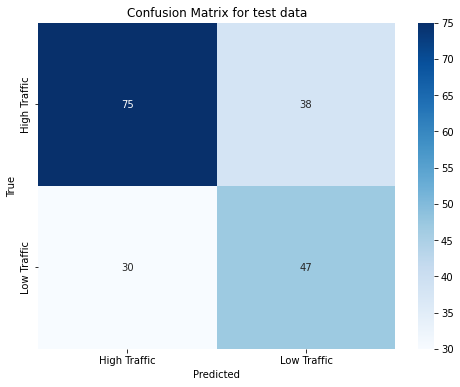

In [112]:
tree = DecisionTreeClassifier(random_state=42)
# fitting (training) the model
tree.fit(X_train, y_train)
# the score of the model
evaluate(tree)

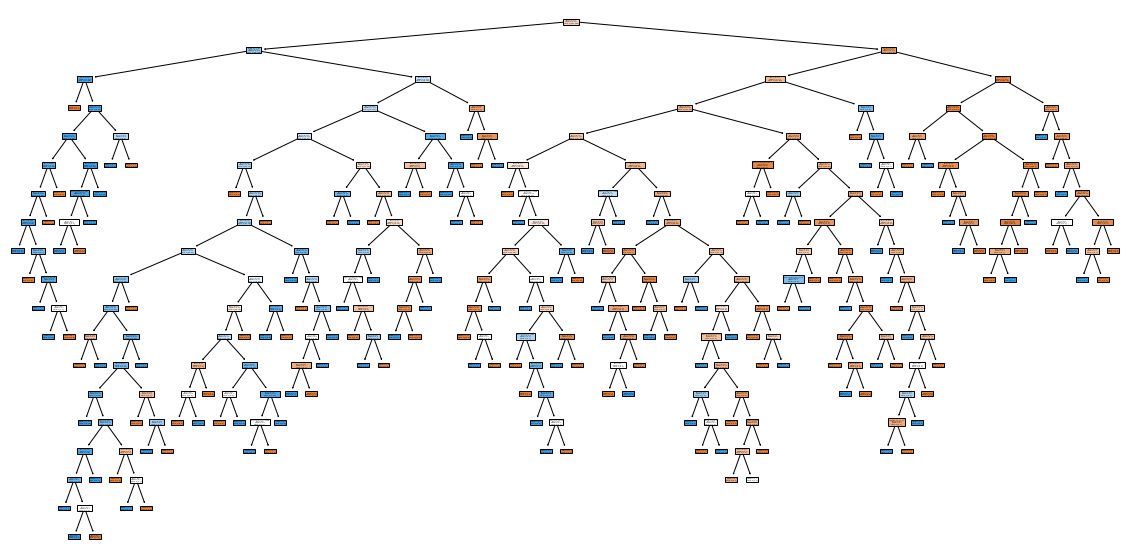

In [67]:
# the model is overfitting 
# let's see the model
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=recipe_s.columns);

In [68]:
# the depth of the tree model
# 18
tree.get_depth()

18

In [69]:
# number of leaves 
tree.get_n_leaves()

157

### Tree Pruning ✂️🌲

simplify the model to make it less overfitting , and enhance its performance aganist the unseen data

In [70]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

using grid search to find the best combination of parameters 

In [71]:
tree2 = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth' : [17, 15, 14, 10, 5, 4, 3, None],
    'min_samples_split' : [8, 9, 10],
    'min_samples_leaf' : [2, 3, 4,5],
    'ccp_alpha' :[0.01, 0.02, 0.016, 0.1, 0, 0.001]
}

grid_tree = GridSearchCV(tree2, param_grid=param_grid, cv=5, scoring='accuracy')

In [72]:
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.01, 0.02, 0.016, 0.1, 0, 0.001],
                         'max_depth': [17, 15, 14, 10, 5, 4, 3, None],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [8, 9, 10]},
             scoring='accuracy')

In [73]:
grid_tree.best_params_

{'ccp_alpha': 0.01,
 'max_depth': 17,
 'min_samples_leaf': 2,
 'min_samples_split': 8}

In [74]:
grid_tree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=17, min_samples_leaf=2,
                       min_samples_split=8, random_state=42)

Train score : 0.76221928665786

Cross Validation score : 0.7622952248170094

Test score : 0.7631578947368421

              precision    recall  f1-score   support



           0       0.80      0.81      0.80       113

           1       0.71      0.70      0.71        77



    accuracy                           0.76       190

   macro avg       0.75      0.75      0.75       190

weighted avg       0.76      0.76      0.76       190



[[91 22]

 [23 54]]


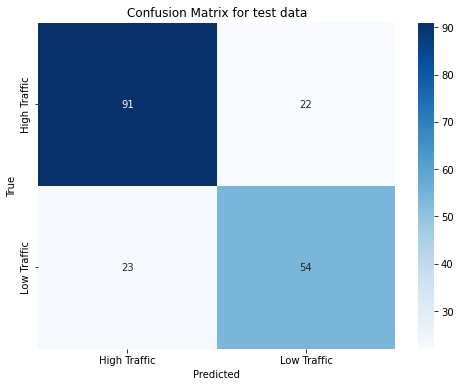

In [114]:
evaluate(grid_tree.best_estimator_)

we can here see how the enhanced tree model make its decision 
first question is the protein <= 3.5 and keeping asking questions like this to filter the data trying reaching more pure nodes or at least to prevent overfitting a nodes that has a majority class 

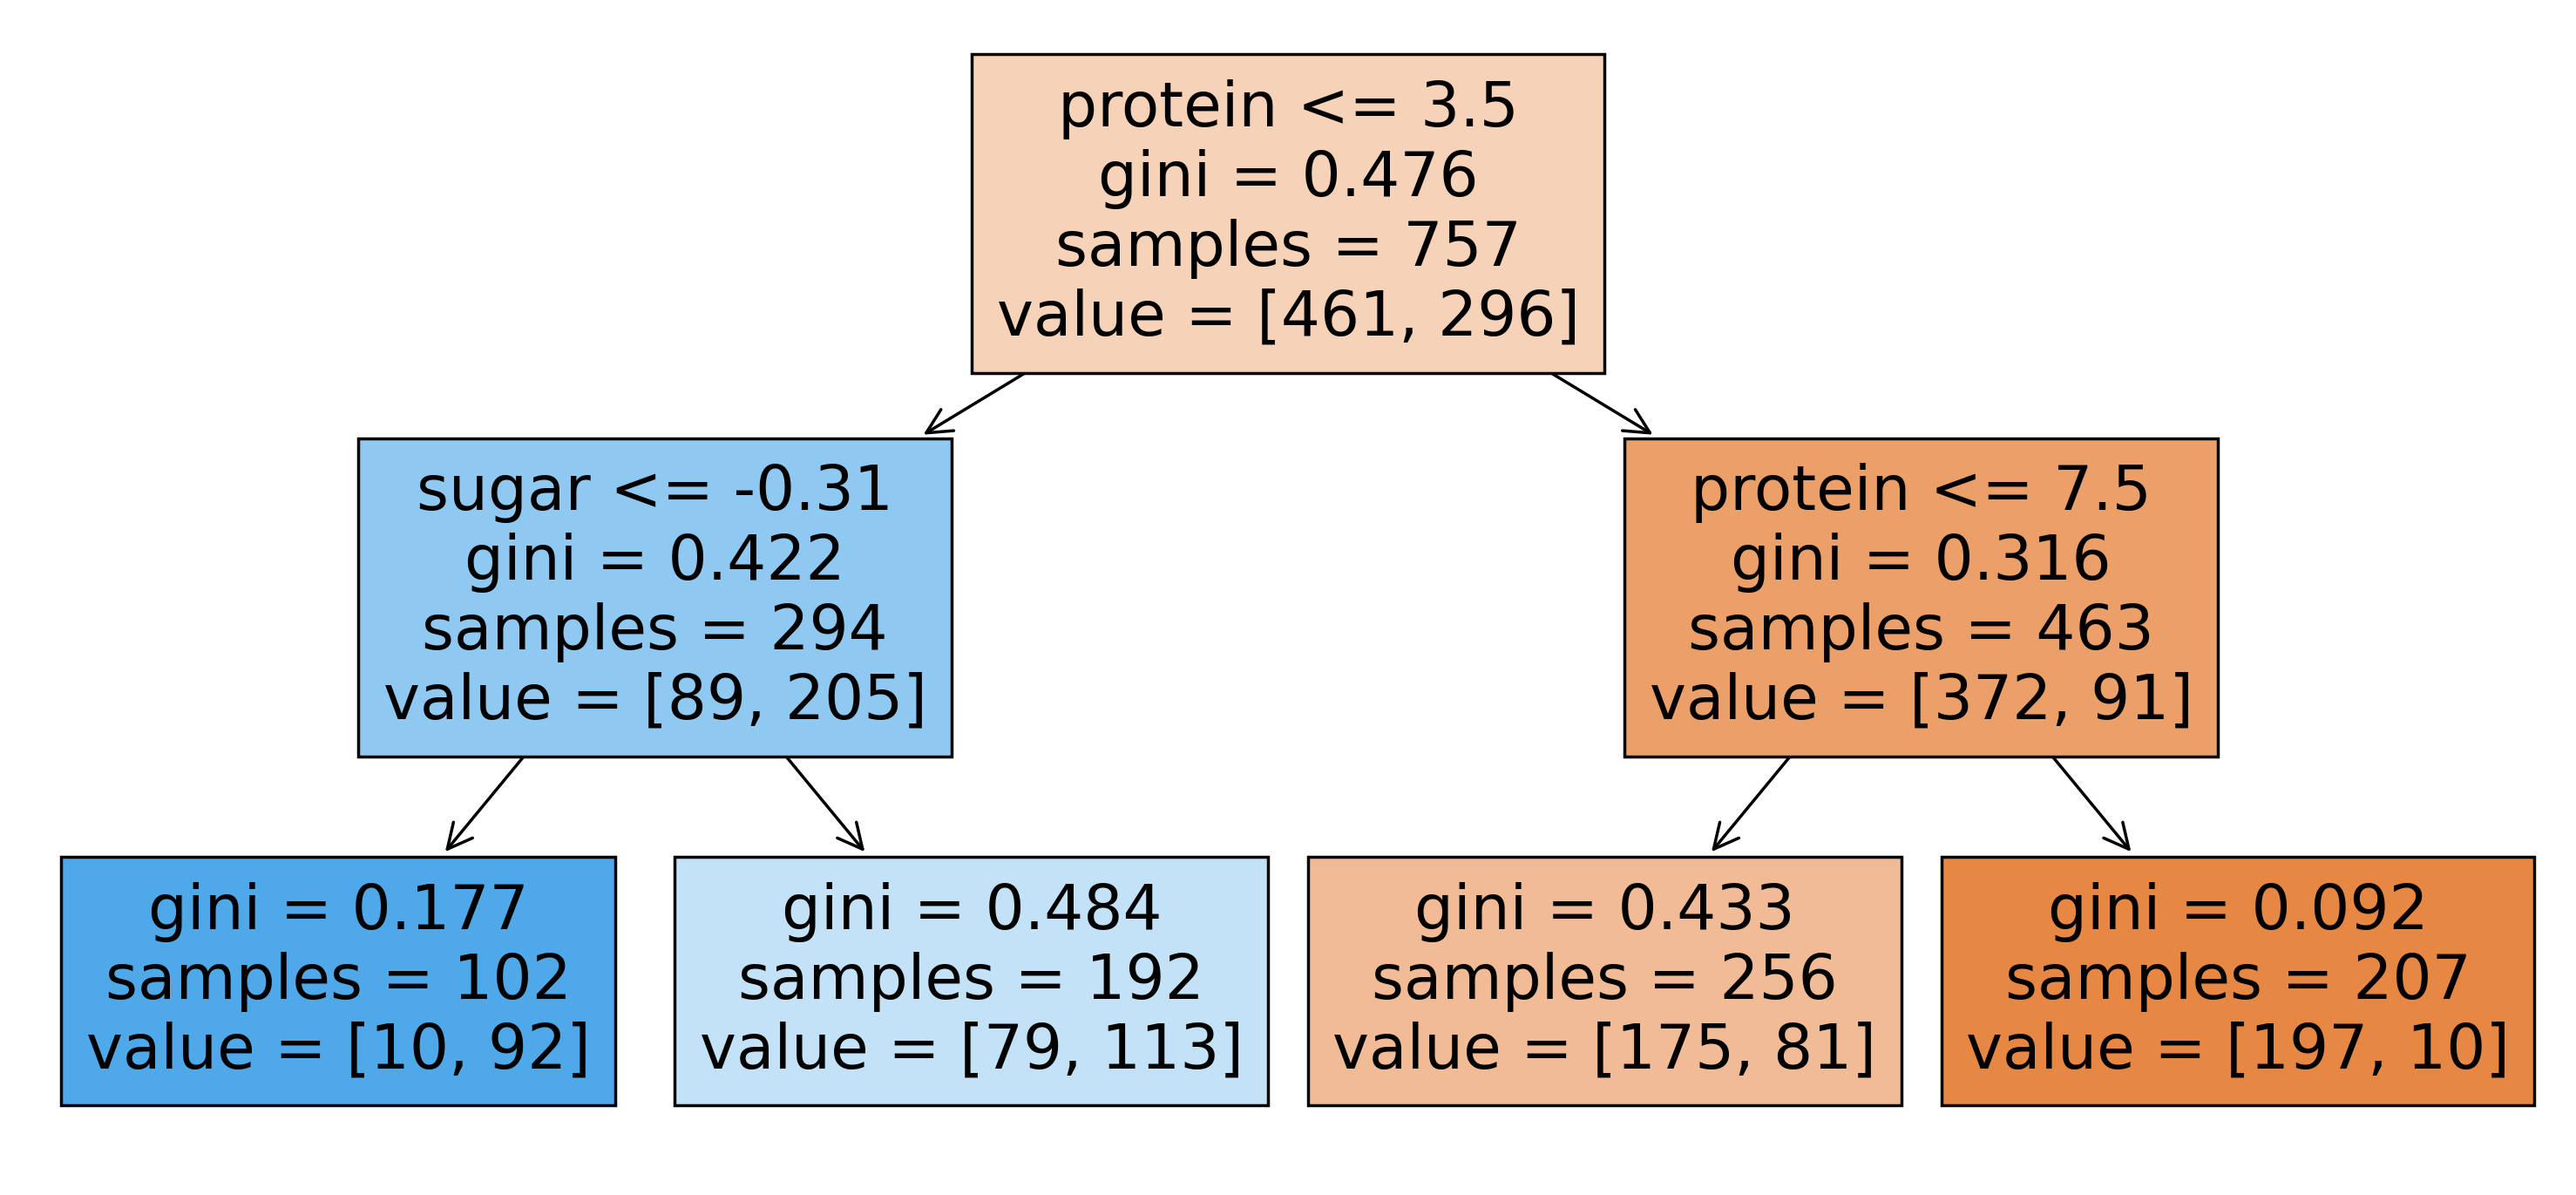

In [76]:
plt.figure(figsize=(15, 7), dpi=250)
plot_tree(grid_tree.best_estimator_, filled=True, feature_names=recipe_s.columns);

we can see the trails the gridsearch did its a brute force approach 

In [77]:
# Set the option to display all rows in full width
pd.set_option('display.max_colwidth', None)
# gridsearch trails 
pd.DataFrame(grid_tree.cv_results_).loc[:, ['params','mean_fit_time','rank_test_score', 'mean_test_score']]

,params,mean_fit_time,rank_test_score,mean_test_score
0,"{'ccp_alpha': 0.01, 'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 8}",0.004158,1,0.762295
1,"{'ccp_alpha': 0.01, 'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 9}",0.003180,1,0.762295
2,"{'ccp_alpha': 0.01, 'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 10}",0.003168,1,0.762295
3,"{'ccp_alpha': 0.01, 'max_depth': 17, 'min_samples_leaf': 3, 'min_samples_split': 8}",0.003982,1,0.762295
4,"{'ccp_alpha': 0.01, 'max_depth': 17, 'min_samples_leaf': 3, 'min_samples_split': 9}",0.005451,1,0.762295
...,...,...,...,...
571,"{'ccp_alpha': 0.001, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 9}",0.002882,559,0.686912
572,"{'ccp_alpha': 0.001, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}",0.002966,529,0.694876
573,"{'ccp_alpha': 0.001, 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 8}",0.002663,472,0.706797
574,"{'ccp_alpha': 0.001, 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 9}",0.003524,472,0.706797


<h2 id='53' style='color:salmon'>Logistic Regression</h2>

In [78]:
logreg = LogisticRegression(random_state=42)
# training the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Train score : 0.7661822985468957

Cross Validation score : 0.7622952248170094

Test score : 0.7526315789473684

              precision    recall  f1-score   support



           0       0.77      0.83      0.80       113

           1       0.72      0.64      0.68        77



    accuracy                           0.75       190

   macro avg       0.75      0.73      0.74       190

weighted avg       0.75      0.75      0.75       190



[[94 19]

 [28 49]]


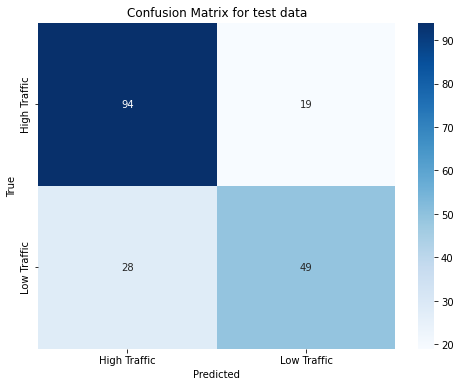

In [115]:
evaluate(logreg)

<h2 id='54' style='color:salmon'>Random Forest</h2>

Train score : 0.9973579920739762

Cross Validation score : 0.7239979086789822

Test score : 0.7263157894736842

              precision    recall  f1-score   support



           0       0.74      0.84      0.79       113

           1       0.70      0.56      0.62        77



    accuracy                           0.73       190

   macro avg       0.72      0.70      0.70       190

weighted avg       0.72      0.73      0.72       190



[[95 18]

 [34 43]]


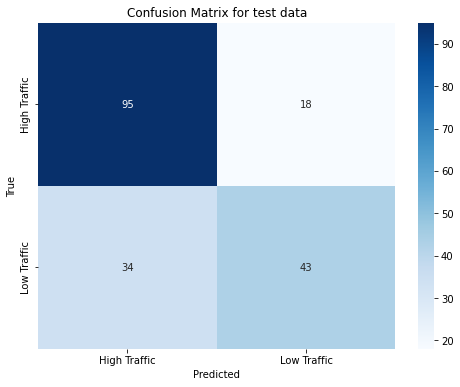

In [116]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
evaluate(forest)

In [81]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Feature Importance 
the features that make the recipe a viral one , this is so important for the business to foucs on as Tast Bytes should foucs on publishing more recipes that foucs on the important features like the categories that people realy love or care about and avoid the recipes that people don't find interesting 

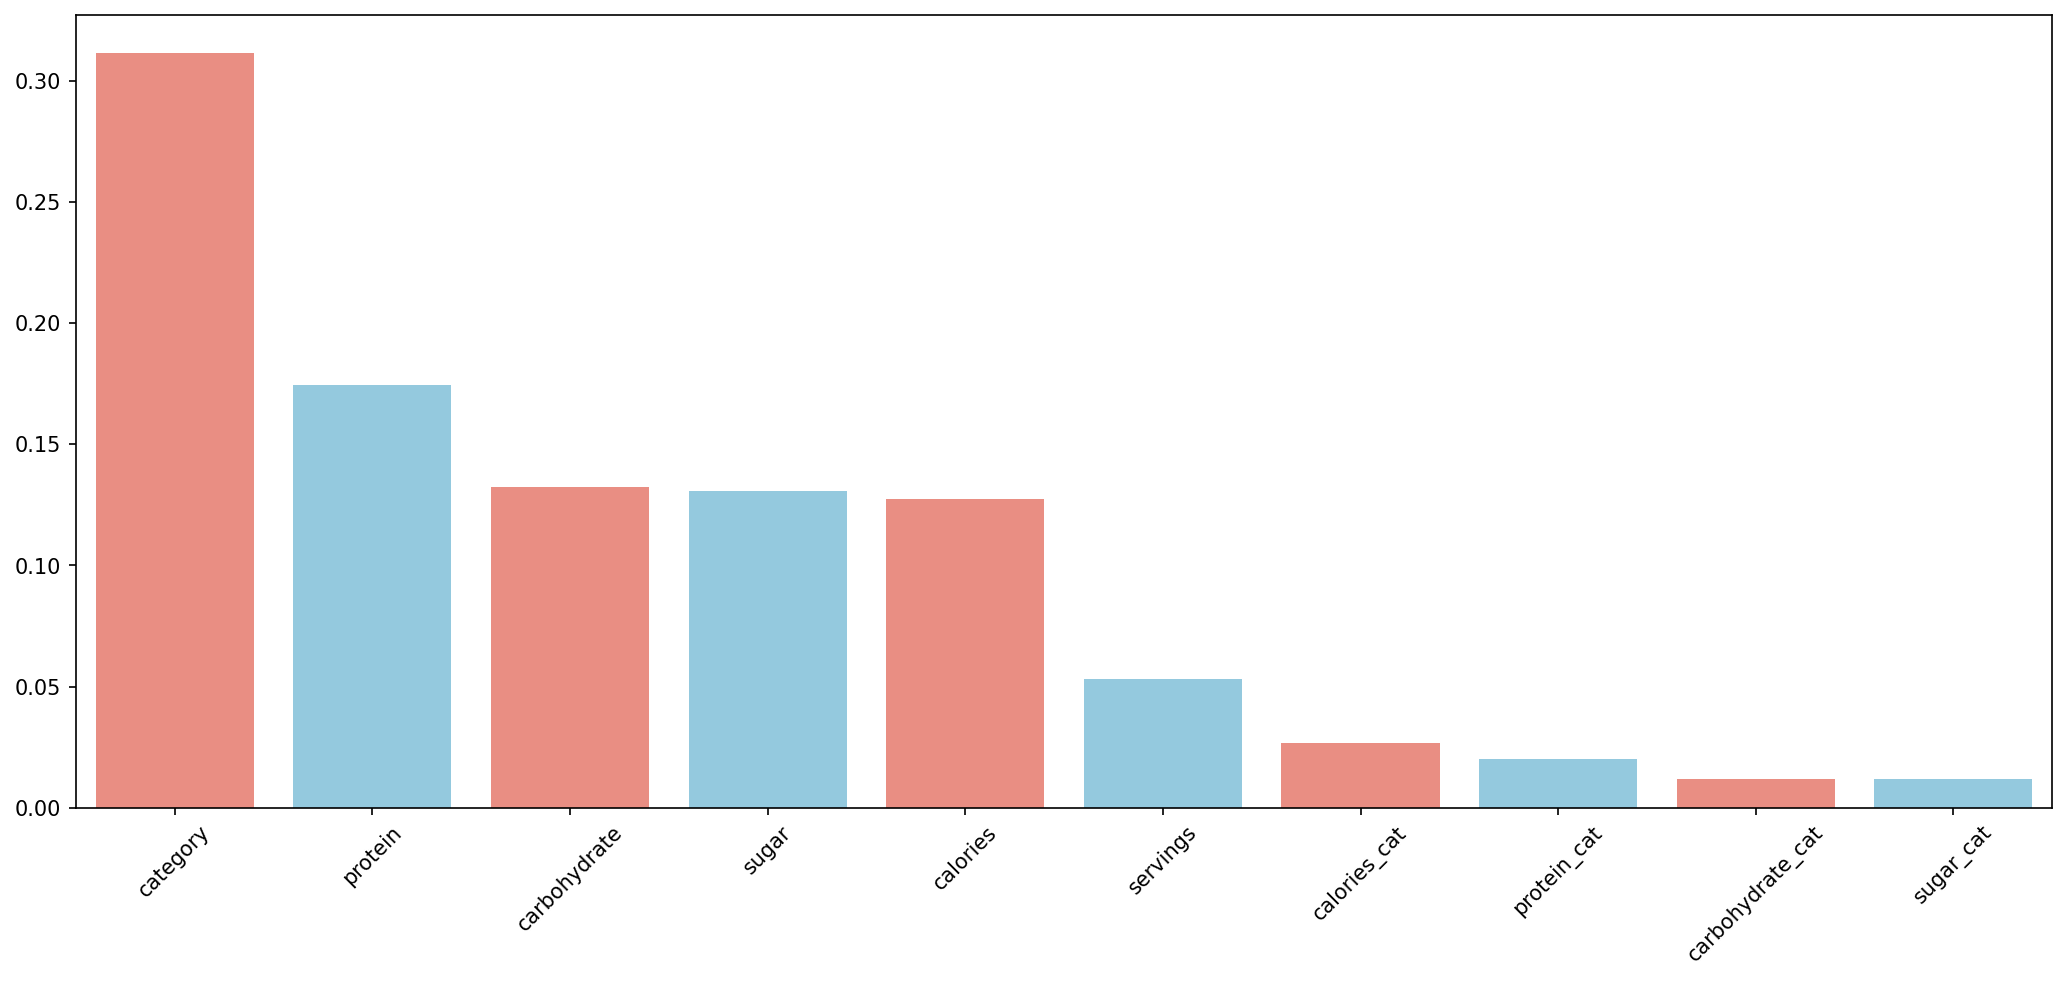

In [161]:
plt.figure(figsize=(17, 7), dpi=150)
features = forest.feature_names_in_
importance = forest.feature_importances_
features_importance = dict(zip(features, importance))
sor_dict = dict(sorted(features_importance.items(), key=lambda x:x[1], reverse=True))
# print(sor_dict, sor_dict.values())
sns.barplot(list(sor_dict.keys()), list(sor_dict.values()), palette=['salmon', 'skyblue'])
plt.xticks(rotation=45);

> **Enhanced Random** Forest by trying **finding the best parameters** to make the model generalise well and make better predictions using **GridSearch** 

Train score : 0.8599735799207398

Cross Validation score : 0.7517340536772396

Test score : 0.7421052631578947

              precision    recall  f1-score   support



           0       0.76      0.83      0.79       113

           1       0.71      0.61      0.66        77



    accuracy                           0.74       190

   macro avg       0.74      0.72      0.73       190

weighted avg       0.74      0.74      0.74       190



[[94 19]

 [30 47]]


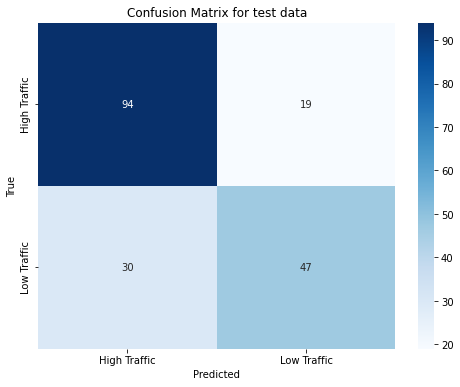

In [117]:
forest2 = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split' : [2, 5, 8, 9, 10],
    'min_samples_leaf' : [1, 2, 4, 5]
}
grid_forest = GridSearchCV(forest2, param_grid=param_grid, cv=5, scoring='accuracy')
grid_forest.fit(X_train, y_train)
evaluate(grid_forest.best_estimator_)

<h2 id='55' style='color:salmon'>Extra Randomized Trees</h2>

Train score : 0.9973579920739762

Cross Validation score : 0.6487016382014639

Test score : 0.6526315789473685

              precision    recall  f1-score   support



           0       0.71      0.71      0.71       113

           1       0.57      0.57      0.57        77



    accuracy                           0.65       190

   macro avg       0.64      0.64      0.64       190

weighted avg       0.65      0.65      0.65       190



[[80 33]

 [33 44]]


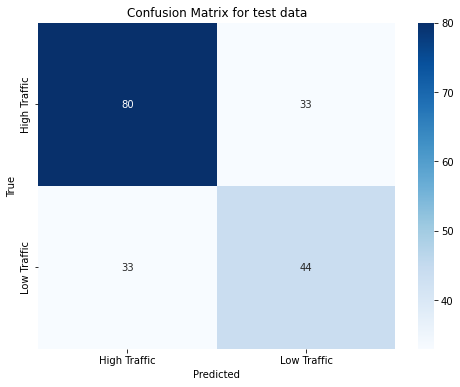

In [119]:
tree_rand = ExtraTreeClassifier(random_state=42)
tree_rand.fit(X_train, y_train)
evaluate(tree_rand)

Enhanced Extra Randomized trees which split the data randomly not using a pure criteria like gini index , it can be fast but not accurate in our case and doesn't satisfy the Business criteria 

Train score : 0.774108322324967

Cross Validation score : 0.7319449285465318

Test score : 0.6789473684210526

              precision    recall  f1-score   support



           0       0.71      0.77      0.74       113

           1       0.62      0.55      0.58        77



    accuracy                           0.68       190

   macro avg       0.67      0.66      0.66       190

weighted avg       0.67      0.68      0.68       190



[[87 26]

 [35 42]]


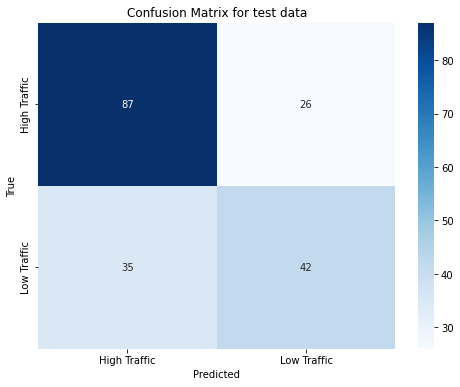

In [118]:
tree_rand2 = ExtraTreeClassifier(random_state=42)

# parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 8, 9, 10, 15, 5, 4],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4, 7],  
    'min_impurity_decrease': [0.0, 0.01, 0.1]  # Adjust the min impurity decrease
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(tree_rand2, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# evaluate
evaluate(grid_search.best_estimator_)

In [85]:
grid_search.best_estimator_

ExtraTreeClassifier(max_depth=8, min_samples_leaf=4, random_state=42)

<h2 id='56' style='color:salmon'>Ada Boost</h2>

>Ada Boost is one of the best candidates to be the model we will select as it achieve **high Business metric score 87%** but we can't trust one number only we need **to see the other type of error** also the <mark>error of predicting that a recipe is would be viral 'high traffic' but in real it's not</mark> the accuracy of this is **58%** which is not good at all so we need to enhance it using GridSearch

Train score : 0.7886393659180978

Cross Validation score : 0.7253049843150923

Test score : 0.7526315789473684

              precision    recall  f1-score   support



           0       0.75      0.87      0.81       113

           1       0.75      0.58      0.66        77



    accuracy                           0.75       190

   macro avg       0.75      0.73      0.73       190

weighted avg       0.75      0.75      0.75       190



[[98 15]

 [32 45]]


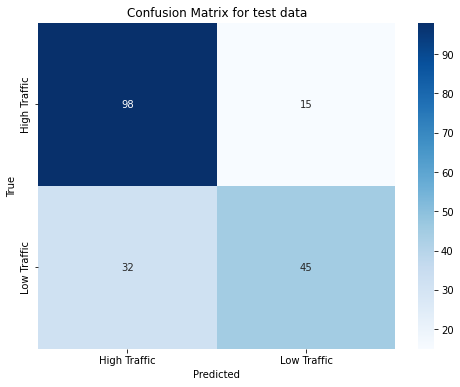

In [120]:
adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train, y_train)
evaluate(adaboost)

> The Enhanced Ada boost lost some accuracy in the Business metric from 87% ---> to 81% but on the other hand it's better than the first ada boost it make less error on the type 2 error I mentioned above, so it's more trust we even consider the above model overfitting whic mean it will not be reliable with unseen recipes (that is bad by the way)

>So Enhanced Adaboost model is a good candidate 

Train score : 0.76221928665786

Cross Validation score : 0.7622952248170094

Test score : 0.7631578947368421

              precision    recall  f1-score   support



           0       0.80      0.81      0.80       113

           1       0.71      0.70      0.71        77



    accuracy                           0.76       190

   macro avg       0.75      0.75      0.75       190

weighted avg       0.76      0.76      0.76       190



[[91 22]

 [23 54]]


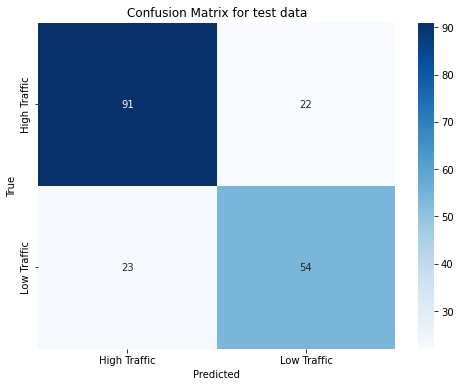

In [121]:
adaboost2 = AdaBoostClassifier(random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],    # Adjust the number of weak learners
    'learning_rate': [0.01, 0.1, 1.0, 0.2, 0.3, 0.4],  # Adjust the learning rate
    'algorithm': ['SAMME', 'SAMME.R']   # Choose the algorithm
}

# Create a grid search with cross-validation
grid_search_adaboost = GridSearchCV(adaboost2, param_grid, cv=5)

# Fit the grid search to your data
grid_search_adaboost.fit(X_train, y_train)

# evaluate
evaluate(grid_search_adaboost.best_estimator_)

In [88]:
grid_search_adaboost.best_estimator_.get_params()

{'algorithm': 'SAMME',
 'base_estimator': None,
 'learning_rate': 0.01,
 'n_estimators': 50,
 'random_state': 42}

<h2 id='565' style='color:salmon'>Ensemble Learner</h2>

> Ensemble Learner here is a combination of models that make a council to decide a one prediction represent all of these model this type of models is **Ensemble Learning speacialy <mark>Bagging technique</mark>**

 I combined the 
- Decision Tree 
- Logistic Regression
- Random Forest 
- Extra Random Tree
- Adaboost 
all in one model 
> the Business metric is satisfied 81% and type2 Recall 64% which is not bad but there is better models can do achieve better score on the error type2 and more simple 

Train score : 0.809775429326288

Cross Validation score : 0.7636023004531196

Test score : 0.7368421052631579

              precision    recall  f1-score   support



           0       0.76      0.81      0.78       113

           1       0.69      0.64      0.66        77



    accuracy                           0.74       190

   macro avg       0.73      0.72      0.72       190

weighted avg       0.73      0.74      0.73       190



[[91 22]

 [28 49]]


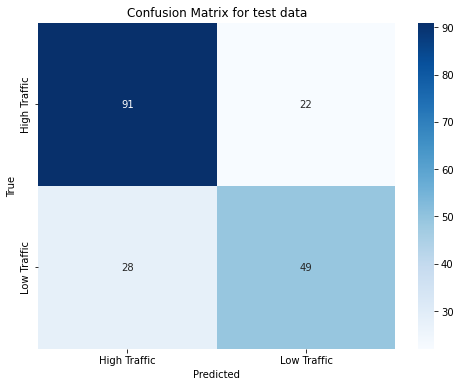

In [122]:
voter = VotingClassifier(estimators=[('tree',  grid_tree.best_estimator_), ('logistic', logreg), ('tree_org', tree), ('forestg',grid_forest.best_estimator_), ('extra', grid_search.best_estimator_), ('adaboost',grid_search_adaboost.best_estimator_ )])
voter.fit(X_train, y_train)
evaluate(voter)

> I built another random forest (enhanced) to see how well it do if we trained it on the full data by using the concept of out of bag score which will allow me to do that

![image-2](image-2.png)

- Business metric 86%
- Type 2 Error 58%
- OOB 75%


OOB score :0.750330250990753

Train score : 0.8348745046235139

Cross Validation score : 0.7583217148832346

Test score : 0.7473684210526316

              precision    recall  f1-score   support



           0       0.75      0.86      0.80       113

           1       0.74      0.58      0.65        77



    accuracy                           0.75       190

   macro avg       0.74      0.72      0.73       190

weighted avg       0.75      0.75      0.74       190



[[97 16]

 [32 45]]


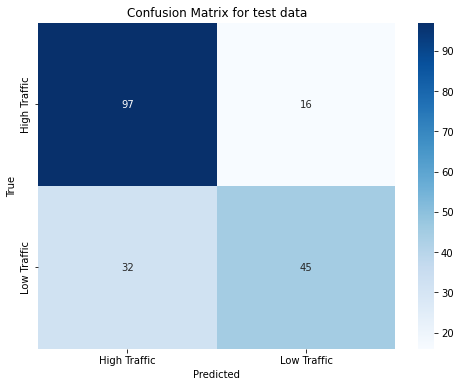

In [123]:
# random forest with the full data and using crossvalidation and OOB score 
forest3 = RandomForestClassifier(random_state=42, oob_score=True)
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'min_samples_split' : [2, 5, 8, 9, 10],
    'min_samples_leaf' : [1, 2, 4, 5],
    'max_depth' : [None, 3, 4, 5, 7, 10]
}
grid_forest2 = GridSearchCV(forest3, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_forest2.fit(X_train, y_train)
print(f"OOB score :{grid_forest2.best_estimator_.oob_score_}")
evaluate(grid_forest2.best_estimator_)

In [91]:
# recipe_s.to_csv('processed_data.csv')

<h2 id='57' style='color:salmon'>Gradient Boost</h2>

>this model is overfitting a and has high error of type 2 so we need to enhance it

Train score : 0.8652575957727873

Cross Validation score : 0.7186650400836528

Test score : 0.7315789473684211

              precision    recall  f1-score   support



           0       0.74      0.84      0.79       113

           1       0.71      0.57      0.63        77



    accuracy                           0.73       190

   macro avg       0.73      0.71      0.71       190

weighted avg       0.73      0.73      0.73       190



[[95 18]

 [33 44]]


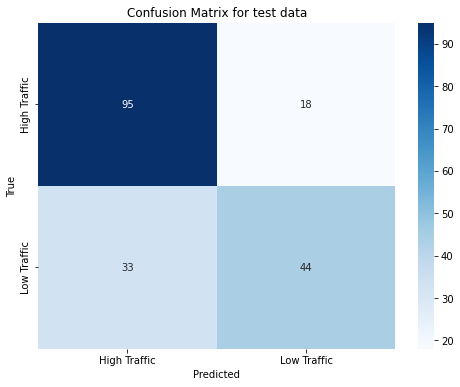

In [124]:
Grad = GradientBoostingClassifier(random_state=42)
Grad.fit(X_train, y_train)
evaluate(Grad)

<h2 id='57' style='color:salmon'>GradientBoosting</h2>

- Business mertic 81%
- type 2 score 70% (only 30% error of type 2)
- Good fitting of the data 
  - train , test and the cross validation is almost the same 
  - which mean this model is reliable

Train score : 0.76221928665786

Cross Validation score : 0.7622952248170094

Test score : 0.7631578947368421

              precision    recall  f1-score   support



           0       0.80      0.81      0.80       113

           1       0.71      0.70      0.71        77



    accuracy                           0.76       190

   macro avg       0.75      0.75      0.75       190

weighted avg       0.76      0.76      0.76       190



[[91 22]

 [23 54]]


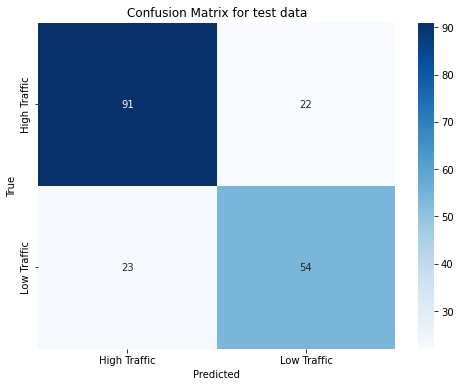

In [126]:
Grad2 = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
}
grid_search_grad = GridSearchCV(estimator=Grad2, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_adaboost.fit(X_train, y_train)
evaluate(grid_search_adaboost.best_estimator_)


# what model to chooce?
- Decision tree enhanced 
- Adaboost enhanced 
- Gradientboost enhanced 
<mark>For all the three models they achieve the same good numbers</mark>
- Business metric 81%
- Cross Validation 76%
- Testing 76% 
- Training 76%
- Recall of class low traffic 70% (type2 error 30%)  
> we can chooce the **Decision tree model** as it provide higher interption and we can easily justify its decision , that can be helpful for the business to foucs on the questions they need to solve or foucs on the important features as we explained above


# Recommendation 
We need to personalize the user experience ; Tasty Bytes aim is to lead the world and provide inspiration in the field of food recipes and delivery.
But people taste defer and we need to make sure that every user experience is enjoyable and customized for that user.
That will make the user engaged more and even he will recommend this experience to his friends .
That will help in increasing the traffic and the time people spending in the website this is so important factor.
What I recommend ?
- Building a Recommendation system in your website which will make each user experience a unique experience of what he really want to see.
- Additionally, I suggest focusing on the features that greatly influence people's preferences. As we discussed earlier, some categories are more popular than others.
